### ASSIGNMENT:

 HINA Inc. is a large FMCG company that is streamlining its marketing budget. This involves taking stock of all its marketing strategies. This, in turn, means re-assessing the effectiveness of its existing spend on various marketing channels. As a marketing data analyst, you need to figure out if spending money on TV advertising campaigns results in a direct increase in sales. In other words, you need to find out if the TV advertising spend and the sales figures share a linear relationship and how strong that relationship is.

#### IMPORTING MODULES 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

##### First, let's load and check the data. Chcek if there are any missing values. 

In [3]:
#loading data with panda
data = pd.read_csv("advertising.csv")

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
#get a quick look at the data, shape and basic values
display(data)
data.shape
data.describe()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


TV column represents amount spent on TV ads.
Radio is amount spent on radio ads.
Newspaper is amount spent on newspaper ads.
Sales is the amount of sales done over a period of time. It is in thousands of dollars and the data were collected weekly.


In [6]:
#looking if there are any missing values
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
missing_data = data.isnull().values.any()
if not missing_data:
    print("No missing.")
else:
    print("Some missing!")

No missing.


In [10]:
# printing all the column names in the missing data and then counting and printing missing data count
missing_data = data.isnull()
for column in list(missing_data.columns):
    print(column)  # It will print all the column names
    print(missing_data[column].value_counts()) #It will count the data values 

TV
False    200
Name: TV, dtype: int64
Radio
False    200
Name: Radio, dtype: int64
Newspaper
False    200
Name: Newspaper, dtype: int64
Sales
False    200
Name: Sales, dtype: int64


Looks like data is clear and we can start analysing. 

#### EXPLORING INTERDEPENDENCE BETWEEN ADVERTISING AND SALES USING CORRELATION


In [13]:
tv_and_sales = data.Sales.corr(data.TV)
print(tv_and_sales)

0.9012079133023305


There is a strong correlation between advertisment spending on TV and amount of Sales because the number is closer to 1.

In [15]:
radio_and_sales = data.Sales.corr(data.Radio)
print(radio_and_sales)

0.34963109700766937


There is a weak relationship between advertisment spending on Radio and Sales

In [16]:
news_and_sales = data.Sales.corr(data.Newspaper)
print(news_and_sales)

0.15796002615492624


There is a very weak correlation between Newspaper advertising and Sales.

##### Correlation of all variables shown in a matrix for better visualisation

In [17]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


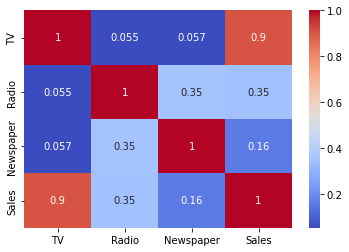

In [18]:
sns.heatmap(data.corr(), cmap='coolwarm', annot=True)
plt.show()

By looking at the correlation plot it is clear that TV compaign and Sales are highly correlated but newspaper and Radio compaign have a weak correlation with the sales.

#### VISUALISATION OF THE CORRELATION 

Text(0.5, 1.0, 'TV campaign spends vs Sales')

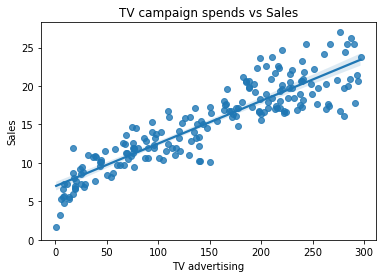

In [20]:
# Lets do a linear regression to visualise each correlation 
plt.ylim(0,)
plt.xlabel("TV advertising")
plt.ylabel("Sales")
plt.title('TV campaign spends vs Sales')

Text(0.5, 1.0, 'Radio campaign spends vs Sales')

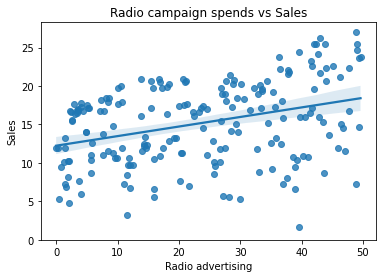

In [21]:
#linear regression to visualise the correltion between Radio advertising and Sales
sns.regplot(x="Radio", y="Sales", data=data)
plt.ylim(0,)
plt.xlabel("Radio advertising")
plt.ylabel("Sales")
plt.title('Radio campaign spends vs Sales')

Text(0.5, 1.0, 'Newspaper campaign spends vs Sales')

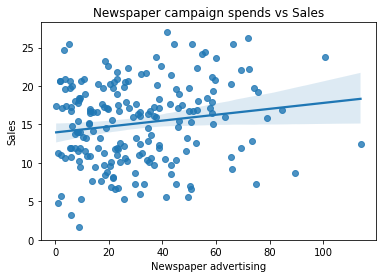

In [22]:
#linear regression to visualise the correlation between Radio advertising and Sales
sns.regplot(x="Newspaper", y="Sales", data=data)
plt.ylim(0,)
plt.xlabel("Newspaper advertising")
plt.ylabel("Sales")
plt.title('Newspaper campaign spends vs Sales')

On the visualisation we can see that the linear regression between advertisment spend on TV and Sales is the strongest. When the spending on advertisment goes higher the Sales grows steeper than in other two cases. We can also see that in this case the samples follow closely the linear relation.

#### DETERMINING IF THE RELATIONSHIP IS STATISTICALLY SIGNIFICANT BY GETTING THE P-VALUES

Assuming an alpha value of 0.05 or 5% is there a significant evidence to show that the TV advertising campaigns have a relationship with the sales. Therefore:

H0: "There is non-linear relationship between TV/Radio/Newspaper compaign and Sales"
H1: "There is a strong linear relationship between TV/Radio/Newspaper compaign and Sales"

significance level (alpha) = 0.05


##### Calculating the p-value to be able to see how strong the correlation is

In [23]:
pearson_coef, p_value = stats.pearsonr(data['TV'], data['Sales'])
print(f"The Pearson Correlation Coefficient is {pearson_coef} with a p_value of P = {p_value}")

The Pearson Correlation Coefficient is 0.9012079133023307 with a p_value of P = 7.927911625321269e-74


##### Conclusion
Since the P-Value < 0.05:the correlation between TV advertising campaign and Sales is statistically significant, and the linear relationship is very very strong of 0.901208. We can reject the HO and confirm H1.

In [24]:
pearson_coef, p_value = stats.pearsonr(data['Radio'], data['Sales'])
print(f"The Pearson Correlation Coefficient is {pearson_coef} with a p_value of P = {p_value}")

The Pearson Correlation Coefficient is 0.34963109700766914 with a p_value of P = 3.882892364494227e-07


##### Conclusion
Since the P-Value < 0.05:the correlation between Radio advertising compaign and Sales is statistically significant, and the linear relationship is not very strong of 0.349361 We can reject HO and confirm H1.

In [25]:
pearson_coef, p_value = stats.pearsonr(data['Newspaper'], data['Sales'])
print(f"The Pearson Correlation Coefficient is {pearson_coef} with a p_value of P = {p_value}")

The Pearson Correlation Coefficient is 0.1579600261549263 with a p_value of P = 0.025487444306997908


##### Conclusion
Since the P-Value < 0.05: the correlation between Newspaper advertising compaign and Sales is statistically significant we can reject HO but the linear relationship is very weak of 0.157960 so I wouldn't talk about strong interdependence as it is mentioned in H1.

#### DISCUSS THE POSSIBILITY OF CORRELATION, CAUSATION OR BOTH BETWEEN THE INDIVIDUAL FEATURE AND SALES

##### Summary:
   In the analysis a Pearson Correlation Coefficient was calculated between each of the advertising modes, TV, Radio and Newspaper, together with a p-value to measure its significance. There is a very strong positive correlation between TV advertising and sales with a high degree of siginificance, in other words the correlation shows sales increasing with TV advertising and its exremely unlikely to be a result of chance. Radio advertising on the otherhand showed only a moderate positive correlation with sales and newspaper advertising had a weak positive correlation with sales. Both the correlation figures of radio and newspaper had a high degree of significance.

##### Conclusion:
   Although we can see that sales and diffrent modes of advertisment is positively correlated we can not safely state that there is a causation in between as well. The data is not sufficient and we would need more variable data to determine what can affect the sales. 
    